<a href="https://colab.research.google.com/github/maiscelo/classical-problems/blob/master/PAA_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [209]:
import seaborn as sns
import pandas as pd
import pylab as plt
import numpy as np
import itertools
import random
import time

inicio = time.time()

#clica em arquivos
#mover as instancias para dentro da pasta sample_data
# Modificar arquivo SATx.txt ou NMx.txt para executar cada instância 

with open('/content/sample_data/SAT3.txt','r',errors='replace') as f:
     linhas=f.readlines()
X = linhas.pop()    #retira a ultima linha, vetor binário de entrada.
X = X[:-1]          
n_literal , n_conjuct = linhas.pop(0).split()
n_literal = int(n_literal)
n_conjuct = int(n_conjuct)
n=len(linhas)

#Gera uma expressão do tipo CNF, uma lista com a estrutura booleana ('literal',True)
def _kcnf(n_literals, n_conjuncts, k=3):
    result = []
    for line in linhas:
        conj = set()
        h = line.split()
        for u in h:
            index = int(u)
            if index > 0:
                conj.add((
                    str(index).rjust(3, '0'),
                    bool(True),
                          ))
            if index < 0:
                 index = index*(-1)
                 conj.add((
                    str(index).rjust(3, '0'),
                    bool(False),
                          ))
            #print(conj) Verificar saida;
        result.append(conj)
    return result

def resultado (ent_):
    return [bool(disj.intersection(ent_)) for disj in ex].count(True)

# Na busca local o vetor é inicalizado com valores randômicos.
def busca_local(entrada):
    entrada = list(entrada)
    r ,t,s = random.randint(0, n_literal-1) ,random.randint(0, n_literal-1), random.randint(0, n_literal-1)
    #print(r,t)
    entrada[r]=(entrada[r][0],bool(entrada[r][1]-True))
    entrada[t]=(entrada[t][0],bool(entrada[t][1]-True))
    entrada[s]=(entrada[s][0],bool(entrada[s][1]-True))
    entrada = set(entrada)
    return (entrada)
#Execução de cada uma instância
ex = _kcnf(n_literal,n_conjuct)
#b = SAT(ex)

x = set(range(1,n_literal+1))
tam=len(ex)
tam = int(tam)

def transforma(can):
    string=[]
    for trans in can:
        string.append(str(trans).rjust(3, '0'))
    return string

def guloso(tam):
   y=set()
   for t in range(70):    #define o alfa
       y.add(random.randrange(1, n_literal+1))
   candidato=set()
   candidato_=[]
   for j in range(tam):
     for h,i in ex[j]:
          if i == True & (int(h) in y)==True:
            candidato.add(int(h))
            #print(h,i)
   rest= x-candidato
   print(rest)
   verd = [True for i in range(len(candidato))]
   falso = [random.choice([True, False]) for i in range(len(rest))]
   candidato =  transforma(candidato)
   rest =  transforma(rest)
   a = set(zip(candidato,verd))
   b = set(zip(rest,falso))
   go=a.union(b)
   return go

def guloso3(tam):
   y=set()
   for t in range(50):    #define o alfa
       y.add(random.randrange(1, n_literal+1))
   candidato=set()
   candidato_=[]
   for j in range(tam):
     for h,i in ex[j]:
          if i == False & (int(h) in y)==True:
            candidato.add(int(h))
            #print(h,i)
   rest= x-candidato
   print(rest)
   verd = [False for i in range(len(candidato))]
   falso = [random.choice([True, False]) for i in range(len(rest))]
   candidato =  transforma(candidato)
   rest =  transforma(rest)
   a = set(zip(candidato,verd))
   b = set(zip(rest,falso))
   go=a.union(b)
   return go


def guloso2(alfa):
    x = set(range(1,101))
    candidato_ = set()
    vetor=[]
    candidato=[]
    for i in [1,2,3]:
        for g in ex[0:50]: #define o alfa
            #print(g)
            minha_lista = list(g)
            #Gera a lista com os valores booleanos
            for i in minha_lista:
                vetor.append(i[1])
                candidato.append(i[0])
                boolarr = np.array(vetor)
                index = np.where(boolarr==True)
       
    #Verifica se na clausula existe literais verdadeiras
                if  len(index) == i:
                    index = index[0].tolist()
                    for i in index:
                          candidato_.add(int(candidato[i]))
                  #Cria a lista de candidados pelo método menor ocorrencias de positivos
    rest= x-candidato_
    verd = [True for i in range(len(candidato))]
    falso = [random.choice([True, False]) for i in range(len(rest))]
    candidato =  transforma(candidato)
    rest =  transforma(rest)
    a = set(zip(candidato,verd))
    b = set(zip(rest,falso))
    go=a.union(b)
    return go


plotar=[]
plotar_star=[]
foi = guloso(tam)
print(foi)
S_star = resultado(foi)
#print(S_star)
plotar_star.append(S_star)
plotar.append(S_star)

#lista de 3 candidatos gulosos.
for h in range(3):
   if h==0:
      foi = guloso(tam)
      #S_star = resultado(foi)
      #print(S_star)
      #plotar_star.append(S_star)
      plotar.append(S_star)
   if h==1:
      foi = guloso(tam)
      #S_star = resultado(foi)
      #print(S_star)
      #plotar_star.append(S_star)
      plotar.append(S_star)
   if h==2:
      foi = guloso(tam)
      #S_star = resultado(foi)
      #print(S_star)
      #plotar_star.append(S_star)
      plotar.append(S_star)
   for i in range(10000):
       local = busca_local(foi)
       result = resultado(local)
       #print(result)
       plotar.append(result)
       if result > S_star:
          S_star = result
          plotar_star.append(S_star)
       #plotar.append(resultado)
   
fim = time.time()
print("Tempo de execução",fim - inicio)

{3, 4, 8, 9, 15, 16, 19, 20, 22, 26, 27, 28, 30, 31, 33, 35, 37, 38, 39, 40, 41, 44, 46, 47, 51, 53, 55, 56, 57, 58, 59, 60, 64, 67, 70, 74, 75, 77, 78, 79, 80, 85, 86, 88, 89, 93, 97, 99}
{('065', True), ('093', True), ('061', True), ('018', True), ('071', True), ('037', False), ('094', True), ('026', False), ('053', True), ('052', True), ('027', False), ('032', True), ('015', True), ('068', True), ('092', True), ('090', True), ('010', True), ('062', True), ('022', True), ('057', True), ('064', False), ('040', True), ('016', True), ('073', True), ('056', True), ('070', False), ('050', True), ('012', True), ('072', True), ('063', True), ('075', True), ('047', True), ('055', True), ('097', True), ('028', True), ('006', True), ('035', True), ('005', True), ('095', True), ('033', True), ('001', True), ('042', True), ('045', True), ('004', False), ('043', True), ('086', True), ('083', True), ('046', True), ('074', True), ('099', False), ('011', True), ('078', True), ('079', False), ('034',

In [133]:
max(plotar)/min(plotar) #gap

1.1894484412470023

In [170]:
sum(plotar)/len(plotar) #média

273.33772163711507

In [181]:
plotar[0] #inicio

1322

In [171]:
min(plotar) #mínimo

247

In [182]:
max(plotar) #max

1475

In [132]:
496/500

0.992

In [208]:
meta=plotar_star

In [211]:
heur=plotar_star

In [212]:
x = np.linspace(0, 2, num=100)

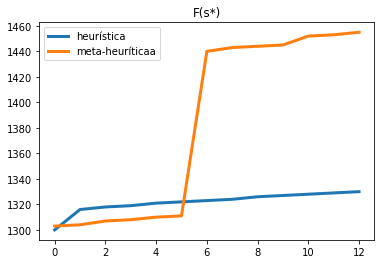

In [221]:
plt.plot(heur, label='heurística', linewidth=3)
plt.plot(meta, label='meta-heuríticaa', linewidth=3)
plt.title("F(s*)")
plt.legend()


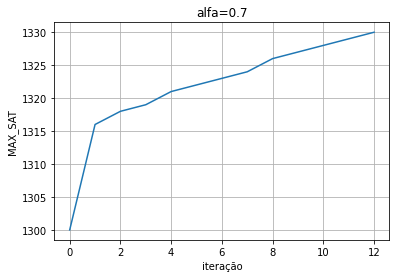

In [210]:
fig, ax = plt.subplots()
ax.set(xlabel='iteração', ylabel='MAX_SAT',
       title='alfa=0.7')
ax.plot(plotar_star)
ax.grid()

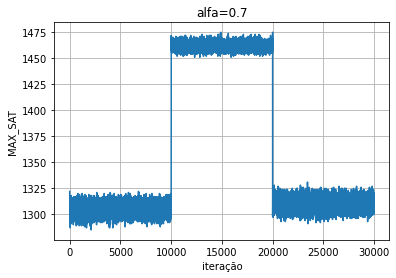

In [185]:
fig, ax = plt.subplots()
ax.set(xlabel='iteração', ylabel='MAX_SAT',
       title='alfa=0.7')
ax.plot(plotar)
ax.grid()

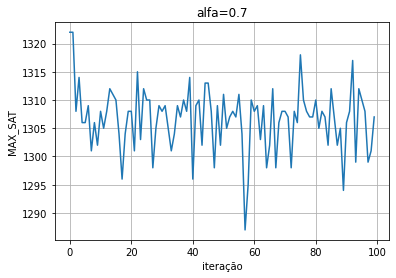

In [186]:
fig, ax = plt.subplots()
ax.set(xlabel='iteração', ylabel='MAX_SAT',
       title='alfa=0.7')
ax.plot(plotar[0:100])
ax.grid()

In [198]:
plotar1=plotar_star

In [196]:
plotar2=plotar_star

In [193]:
plotar3=plotar_star

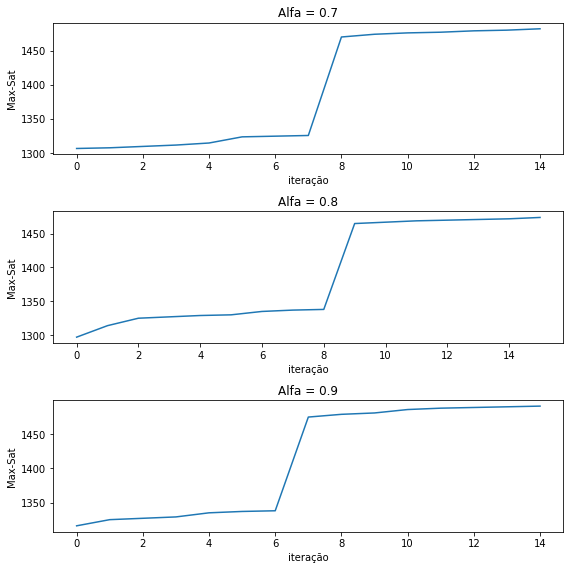

In [199]:
fig, ax = plt.subplots(3,figsize=(8,8))
ax[0].set_title('Alfa = 0.7')
ax[1].set_title('Alfa = 0.8')
ax[2].set_title('Alfa = 0.9')

ax[0].plot(plotar1)
ax[1].plot(plotar2)
ax[2].plot(plotar3)


for axs in ax.flat:
    axs.set(xlabel='iteração', ylabel='Max-Sat')
fig.tight_layout(pad=1.0)

In [ ]:
ax[0].plot(plotar)
ax[1].plot(plotar)

NameError: ignored

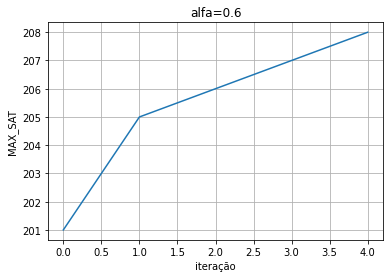

In [ ]:
fig, ax = plt.subplots()
ax.set(xlabel='iteração', ylabel='MAX_SAT',
       title='alfa=0.6')
ax.plot(plotar)
ax.grid()

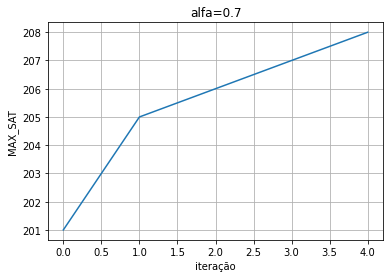

In [ ]:
fig, ax = plt.subplots()
ax.set(xlabel='iteração', ylabel='MAX_SAT',
       title='alfa=0.7')
ax.plot(plotar)
ax.grid()

In [ ]:
resultado = [bool(disj.intersection(foi)) for disj in ex].count(True)

In [ ]:
foi = list(foi)
foi[r]=(foi[r][0],bool(foi[r][1]-True))

In [ ]:
foi[r]

('093', True)

In [ ]:
t

39

In [ ]:
r ,t = random.randint(1, 100) ,random.randint(1, 100)

In [ ]:
verd = [True for i in range(len(candidato))]
falso = [False for i in range(len(rest))]

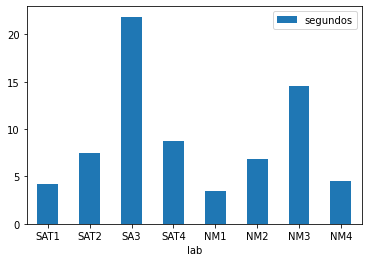

In [183]:
import pandas as pd
df = pd.DataFrame({'lab':['SAT1', 'SAT2', 'SA3', "SAT4","NM1","NM2","NM3",'NM4'], 'segundos':[4.230, 7.422, 21.861,8.7810,3.484,6.819, 14.524, 4.545]})
df.plot.bar(x='lab', y='segundos', rot=0)
#plot.title("Performance")

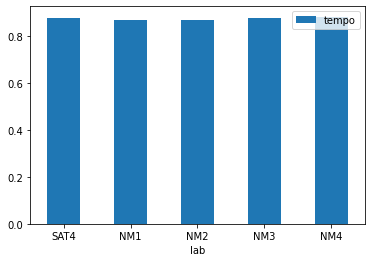

In [ ]:
import pandas as pd
df = pd.DataFrame({'lab':["SAT4","NM1","NM2","NM3",'NM4'], 'tempo':[0.878 ,0.869,0.869, 0.876,0.883]})
ax = df.plot.bar(x='lab', y='tempo', rot=0)

In [202]:
valores_produto_A = [600,230,460,1000,300]

# Quantidade de vendas para o Produto B
valores_produto_B =[592,228,454,989,295]

# Cria eixo x para produto A e produto B com uma separação de 0.25 entre as barras
x1 =  np.arange(len(valores_produto_A))
x2 = [x + 0.25 for x in x1]


In [ ]:
média

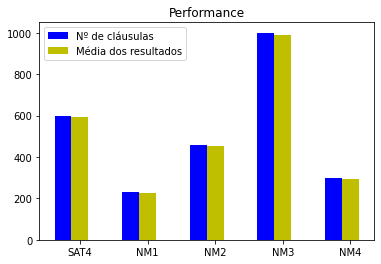

In [203]:
plt.bar(x1, valores_produto_A, width=0.25, label ='Nº de cláusulas', color = 'b')
plt.bar(x2, valores_produto_B, width=0.25, label = "Média dos resultados", color = 'y')

# coloca o nome dos meses como label do eixo x
meses = ["SAT4","NM1","NM2","NM3",'NM4']
plt.xticks([x + 0.25 for x in range(len(valores_produto_A))], meses)

# inseri uma legenda no gráfico
plt.legend()

plt.title("Performance")
plt.show()

In [ ]:
#Esta função vai receber a expressão cnf retornar a interseção, contando o numero de True.
def SAT (cnf):
    literals = set()
    for conj in cnf:
        for disj in conj:
            literals.add(int(disj[0]))
    literals = list(literals)
    n = len(literals)
    print(n)
    b=[]
    for i in X:
        b.append(bool(int(i)))
    string=[]
    for trans in literals:
        string.append(str(trans).rjust(3, '0'))
    go = set(zip(string,b)) 
    print(go)
    resultado = [bool(disj.intersection(go)) for disj in ex].count(True)
    for seq in itertools.product([False,True], repeat=n):
        zeros = set(zip(string, seq))
        break
    resultado1 = [bool(disj.intersection(zeros)) for disj in ex].count(True)
    return resultado1, resultado

In [ ]:
print("ordem: (F(0),F(X))")
print("instancia 1:",a,"instancia 2:",b,"instancia 3:",c)

ordem: (F(0),F(X))


NameError: ignored

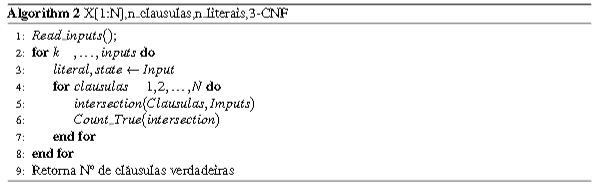